# Linear Regression Practice #


### Cavin Jacobson ###

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [3]:
gdp_le = pd.read_csv('../data/gdp_le.csv')

In [4]:
gdp_le.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


**1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.**

In [6]:
gdp_le_linear = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

In [333]:
gdp_le_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        13:24:38   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -468.1381     26.087    -17.945      0.000    -519.279    -416.998
Year           0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                     4.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**1a. What coefficients do you get? Interpret the meaning of these coefficents.**

It shows a steep negative line where the initial decrease of the dependent variable is much lower than the independent variable's lowest point. This is not a realistic or useful intercept.

**1b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?**

These new coefficients look a lot more realistic. The p values confirm that these are statistically significant.

In [232]:
gdp_le_new = smf.ols("Life_Expectancy ~ I(Year - 1990)", data=gdp_le).fit()
gdp_le_new.params

Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

In [311]:
gdp_le_year = gdp_le.groupby('Year')['Life_Expectancy'].mean().reset_index()
gdp_le_year['mean_estimate'] = gdp_le_new.predict(gdp_le_year)

In [313]:
gdp_le_year.head()

,Year,Life_Expectancy,mean_estimate
0,1990,64.745253,64.628889
1,1991,65.021276,64.896612
2,1992,65.217845,65.164334
3,1993,65.218031,65.432056
4,1994,65.339539,65.699778


**1c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?**

It is very close with some deviation from the line in the early 90's and late 2020.

**1d. Plot the actual values against your model's estimates for the mean life expectancy.**

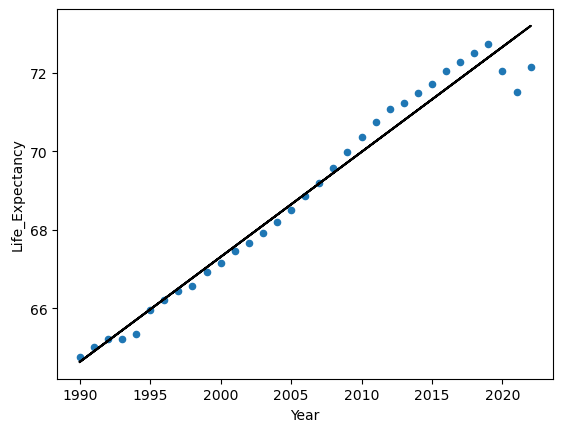

In [315]:
gdp_le_year.plot(kind='scatter', x='Year', y='Life_Expectancy')
plt.plot(gdp_le['Year'], gdp_le_new.fittedvalues, color='black');

**1e. Inspect the R-squared value for the model. does it make sense, given the plot?**

In [242]:
gdp_le_new.rsquared

0.07154748843194658

**2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.**

In [285]:
gdp_le_2021 = gdp_le.loc[gdp_le['Year'] == 2021]

**2a. What coefficients do you get? Interpret the meaning of those coefficients.**

I have 65.9 for the intercept and .000257 for the slope. This intercept is close to the intercept for all years for life expectancy, however the slope is way less than life expectancy, and cannot be very useful due to its size.

In [331]:
gdp_lin_2021 = smf.ols("Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021).fit()
gdp_lin_2021.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        13:22:05   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         65.9499      0.549    120.225      0.000      64.867      67.033
GDP_Per_Capita     0.0003   1.76e-05     14.608      0.000       0.000       0.000
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                     4.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**2b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?**

Yes, this changes the slope to be a reasonable and useful number. 

In [335]:
gdp_lin_2021 = smf.ols("Life_Expectancy ~ I(GDP_Per_Capita / 1000)", data=gdp_le_2021).fit()
gdp_lin_2021.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        13:27:07   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   65.9499      0.549    120.225      0.000      64.867      67.033
I(GDP_Per_Capita / 1000)     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**2c. Are the coefficients statistically significant?**

According to the summary, these coefficients are statistically significant.

**2d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is 50,000? What about one whose gdp per capita is 100,000?**

The slope increases by each change. This estimates that very few people meet the criteria more and more.


In [291]:
gdp_lin_2021 = smf.ols("Life_Expectancy ~ I(GDP_Per_Capita / 50000)", data=gdp_le_2021).fit()
gdp_lin_2021.params

Intercept                    65.949870
I(GDP_Per_Capita / 50000)    12.844587
dtype: float64

In [293]:
gdp_lin_2021 = smf.ols("Life_Expectancy ~ I(GDP_Per_Capita / 100000)", data=gdp_le_2021).fit()
gdp_lin_2021.params

Intercept                     65.949870
I(GDP_Per_Capita / 100000)    25.689175
dtype: float64

**2e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?**

<Axes: xlabel='Life_Expectancy', ylabel='GDP_Per_Capita'>

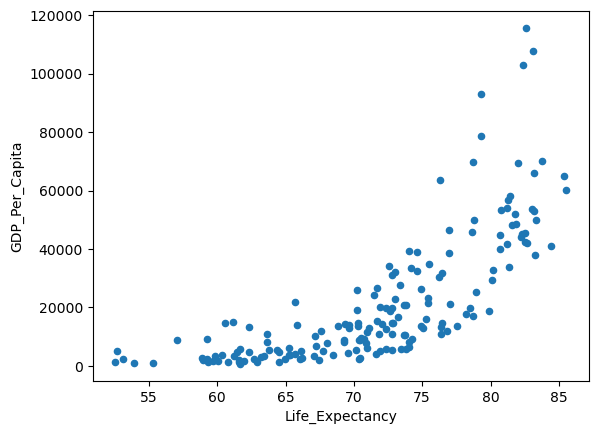

In [307]:
gdp_le_2021.plot(kind='scatter', x='Life_Expectancy', y='GDP_Per_Capita')
#plt.plot(gdp_le_2021['GDP_Per_Capita'], gdp_lin_2021.fittedvalues, color='black');

**3. Now, fit a model for life expectancy based on the log of gdp per capita.**?

In [327]:
gdp_log = np.log(gdp_le_2021['GDP_Per_Capita'])
gdp_log_2021 = smf.ols("Life_Expectancy ~ I(gdp_log)", data=gdp_le_2021).fit()

In [329]:
gdp_log_2021.params

Intercept     18.946970
I(gdp_log)     5.589014
dtype: float64

**3a. Inspect the coefficients for this model. Are they statistically significant? b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of 50,000? What about for those with a gdp per capita of 100,000?**

**3c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?**

**4. Finally, return to the full dataset.**

**4a. First, fit a linear regression model for life expectancy based on the log of gdp per capita.**

**4b. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?**